In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
from skimage import io,transform
# import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
dataDir='data'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [3]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.75s)
creating index...
index created!


In [4]:
def split_data(category='person'):
    """
    returns: [yes_file_names, no_file_names]
    """
    cat_id = coco.getCatIds(catNms=[category])[0]
    img_ids = coco.getImgIds(catIds=[cat_id])
    yes_imgs = coco.loadImgs(ids=img_ids)
    yes_file_names = [im['file_name'] for im in yes_imgs]

    no_target_ids_set = set(coco.getImgIds()) - set(img_ids)
    no_imgs = coco.loadImgs(ids=list(no_target_ids_set))
    no_file_names = [im['file_name'] for im in no_imgs]

    return [yes_file_names, no_file_names]

yes_files,no_files = split_data()

In [5]:

def resize(im, target_size=500):
    """
    im: numpy.ndarray
    returns:
        numpy.ndarray
    """
    h,w = im.shape[:2]
    scale = target_size / max(h, w)
    new_h, new_w = int(h * scale), int(w * scale)
    resized = transform.resize(im, (new_h, new_w), anti_aliasing=True)
    resized = (resized * 255).astype(np.uint8)

    padded = np.zeros((target_size, target_size, 3), dtype=np.uint8)

    # Compute top-left corner for centering
    top = (target_size - new_h) // 2
    left = (target_size - new_w) // 2

    padded[top:top+new_h, left:left+new_w] = resized

    return padded



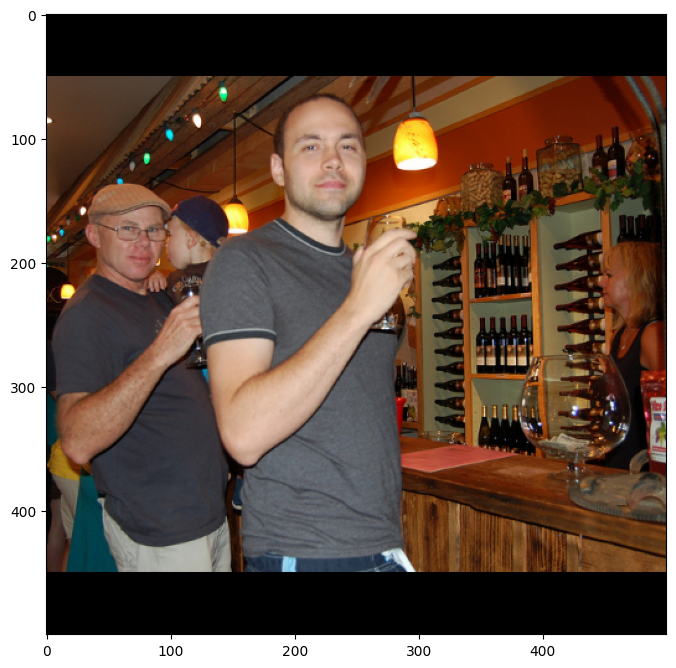

In [6]:
file_name = yes_files[np.random.randint(0,len(yes_files))]
im = io.imread(f'{dataDir}/images/{file_name}')
resized = resize(im)
plt.imshow(resized)
plt.show()